# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1699317165914.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,11/03/2023,4358.34,4334.23,4373.62,4334.23
1,11/02/2023,4317.78,4268.26,4319.72,4268.26
2,11/01/2023,4237.86,4201.27,4245.64,4197.74
3,10/31/2023,4193.80,4171.33,4195.55,4153.12
4,10/30/2023,4166.82,4139.39,4177.47,4132.94
...,...,...,...,...,...
2531,11/12/2013,1767.69,1769.51,1771.78,1762.29
2532,11/11/2013,1771.89,1769.96,1773.44,1767.85
2533,11/08/2013,1770.61,1748.37,1770.78,1747.63
2534,11/07/2013,1747.15,1770.74,1774.54,1746.20


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2536.000000,2536.000000,2536.000000,2536.000000
mean,2955.951167,2939.931183,2955.884132,2922.713044
std,892.121622,925.635049,932.098731,918.930203
min,1741.890000,0.000000,0.000000,0.000000
25%,2104.195000,2102.780000,2110.940000,2094.762500
50%,2761.880000,2767.780000,2779.165000,2748.830000
75%,3842.660000,3840.897500,3872.605000,3809.750000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,2963.712572,2963.301065,2979.380827,2945.946057
std,891.334652,891.254303,897.598807,884.690608
min,1741.890000,1743.820000,1755.790000,1737.920000
25%,2108.242500,2107.647500,2114.502500,2098.537500
50%,2771.900000,2774.485000,2785.920000,2757.900000
75%,3851.977500,3850.352500,3879.080000,3816.335000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

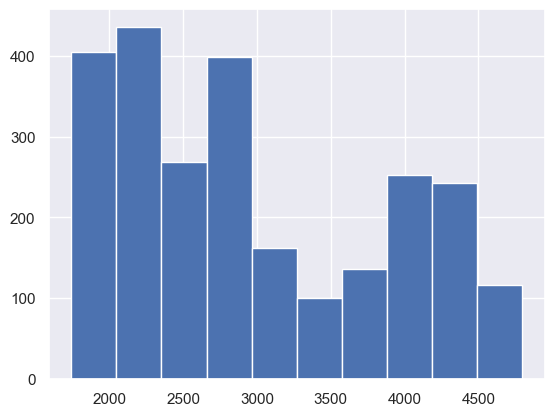

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4358.34

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2963.7125715421394

In [10]:
close_sd = df['Close/Last'].std()
close_sd

891.3346522530043

In [11]:
sigma1 = close_mean + close_sd
sigma1

3855.0472237951435

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4746.381876048148

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5192.04920217465

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2535
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-11-06 to 2023-11-03')

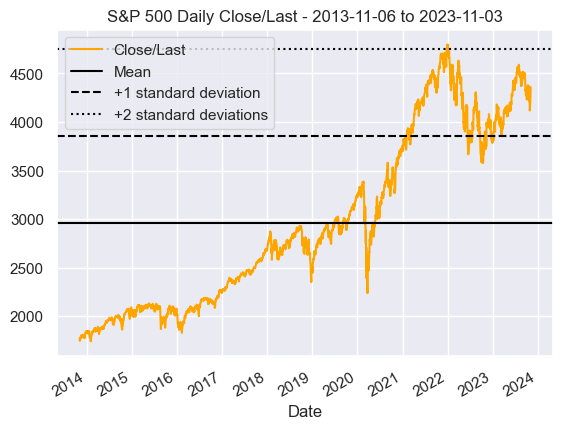

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-11-06 to 2023-11-03')

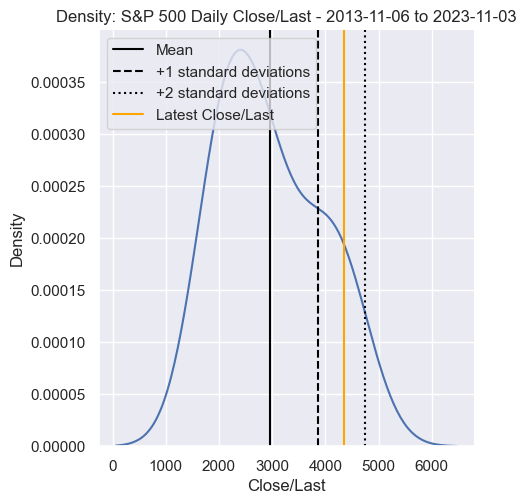

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.5646507458592527

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results